Iniciando análisis...
Conectando con repositorio GitHub: https://github.com/jeraldine-r/proyectos_brecha_digital/raw/main/anexo%20general-ECV-2024.xlsx...
Conexión exitosa.
Procesando datos...

RESULTADOS DEL ANÁLISIS

1️⃣ Top 5: Brecha de Mercado (Absoluta):
AREA             URBANO      RURAL  BRECHA_ABSOLUTA
DEPARTAMENTO                                       
Córdoba       67.741452  16.813765        50.927688
Arauca        73.122215  22.443288        50.678927
La Guajira    63.054085  12.938593        50.115492
Meta          66.742886  17.367971        49.374915
Caquetá       55.019872   6.577603        48.442269

2️⃣ Top 5: Brecha Estructural (Inequidad Relativa):
AREA          URBANO  RURAL  BRECHA_RELATIVA
DEPARTAMENTO                                
Amazonas       37.09   0.00           100.00
Guainía        16.49   0.00           100.00
Vichada        10.69   0.00           100.00
Vaupés         18.96   0.00           100.00
Caquetá        55.02   6.58            88.05

 Genera

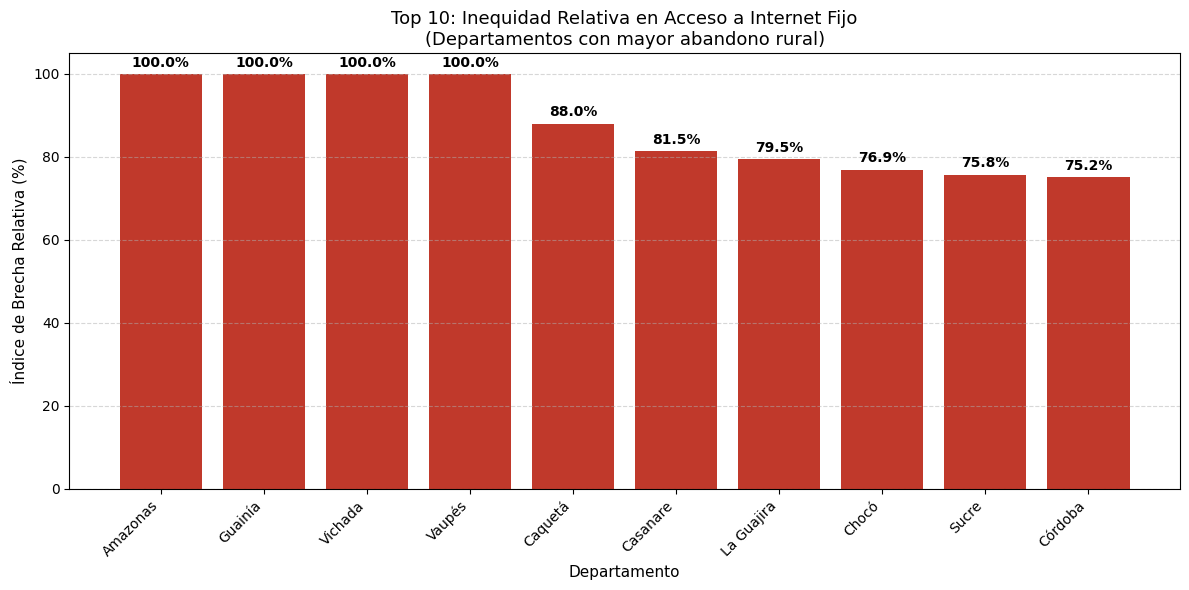

Ejecución finalizada.


In [3]:
# ==========================================
# 🇨🇴 ANÁLISIS DE BRECHA DIGITAL COLOMBIA
# Autor: Juliana
# Fuente: ECV 2024 (DANE) - Vía GitHub
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN Y CONEXIÓN ---
# Usamos el enlace "raw" de TU repositorio.
# Nota: El "%20" reemplaza los espacios en el nombre del archivo para que internet lo entienda.
URL_ARCHIVO = 'https://github.com/jeraldine-r/proyectos_brecha_digital/raw/main/anexo%20general-ECV-2024.xlsx'
NOMBRE_HOJA = 'Cuadro 7'

print(f"Iniciando análisis...")
print(f"Conectando con repositorio GitHub: {URL_ARCHIVO}...")

try:
    # --- 2. CARGA DE DATOS (Desde la Nube) ---
    # Pandas lee el Excel directamente desde la URL. No hace falta descargar nada manual.
    df_raw = pd.read_excel(URL_ARCHIVO, sheet_name=NOMBRE_HOJA, header=3)
    print("Conexión exitosa.")

    # --- 3. LIMPIEZA Y TRANSFORMACIÓN (ETL) ---
    print("Procesando datos...")

    # Seleccionamos columna por índice para mayor seguridad
    col_tasa = df_raw.columns[18]

    df_raw.rename(columns={
        df_raw.columns[0]: 'DEPARTAMENTO',
        df_raw.columns[1]: 'AREA',
        col_tasa: 'TASA_ACCESO_FIJO'
    }, inplace=True)

    # Rellenamos los nombres de departamentos (ffill) y convertimos a números
    df_raw['DEPARTAMENTO'] = df_raw['DEPARTAMENTO'].ffill()
    df_raw['TASA_ACCESO_FIJO'] = pd.to_numeric(df_raw['TASA_ACCESO_FIJO'], errors='coerce')

    # Filtramos solo Cabecera y Rural
    df_limpio = df_raw[df_raw['AREA'].isin(['Cabecera', 'Centros poblados y rural disperso'])].copy()
    df_limpio.dropna(subset=['TASA_ACCESO_FIJO'], inplace=True)

    # Pivotamos la tabla (Urbano vs Rural)
    df_pivot = df_limpio.pivot(index='DEPARTAMENTO', columns='AREA', values='TASA_ACCESO_FIJO')
    df_pivot.rename(columns={'Cabecera': 'URBANO', 'Centros poblados y rural disperso': 'RURAL'}, inplace=True)
    df_pivot.dropna(subset=['URBANO', 'RURAL'], inplace=True)

    # --- 4. CÁLCULOS DE BRECHA ---
    # A) Brecha Absoluta (Diferencia simple)
    df_pivot['BRECHA_ABSOLUTA'] = df_pivot['URBANO'] - df_pivot['RURAL']

    # B) Brecha Relativa (Índice de Inequidad)
    df_pivot['BRECHA_RELATIVA'] = ((df_pivot['URBANO'] - df_pivot['RURAL']) / df_pivot['URBANO']) * 100

    # --- 5. RESULTADOS ---
    top_absoluta = df_pivot.sort_values('BRECHA_ABSOLUTA', ascending=False).head(5)
    top_relativa = df_pivot.sort_values('BRECHA_RELATIVA', ascending=False).head(5)

    print("\n" + "="*40)
    print("RESULTADOS DEL ANÁLISIS")
    print("="*40)

    print("\n1️⃣ Top 5: Brecha de Mercado (Absoluta):")
    print(top_absoluta[['URBANO', 'RURAL', 'BRECHA_ABSOLUTA']])

    print("\n2️⃣ Top 5: Brecha Estructural (Inequidad Relativa):")
    print(top_relativa[['URBANO', 'RURAL', 'BRECHA_RELATIVA']].round(2))

    # --- 6. VISUALIZACIÓN ---
    print("\n Generando gráfico...")
    plt.figure(figsize=(12, 6))

    # Graficamos el Top 10 de Inequidad Relativa
    grafico_data = df_pivot.sort_values('BRECHA_RELATIVA', ascending=False).head(10)
    barras = plt.bar(grafico_data.index, grafico_data['BRECHA_RELATIVA'], color='#C0392B')

    plt.title('Top 10: Inequidad Relativa en Acceso a Internet Fijo\n(Departamentos con mayor abandono rural)', fontsize=13)
    plt.ylabel('Índice de Brecha Relativa (%)', fontsize=11)
    plt.xlabel('Departamento', fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Etiquetas de datos
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, altura + 1,
                 f'{altura:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()
    print("Ejecución finalizada.")

except Exception as e:
    print(f"\n Ocurrió un error: {e}")
    print("Pista: Verifica que el archivo en GitHub sea público y tenga el nombre correcto.")